In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [2]:
train = pd.read_csv("train.csv",index_col=0)
val = pd.read_csv("val.csv",index_col=0)
test = pd.read_csv("test.csv",index_col=0)
print(len(train), len(val), len(test))
train.head(2)

1000 250 250


,Albumin,Calcium,Immature Granulocytes,Lymphocytes,Neutrophils,Glucose,M.C.H. (Hb/Rbc),M.C.H.C. (Hb/Ht),Magnesium,Sodium,...,renal_cysts,liver_cysts,kidney_stones,bladder_stones,distended_bowels,ground_glass,temperature,risk_1,risk_2,risk_3
0,37.233024,2.381028,0.162536,1.411932,7.298400,6.621198,1.838717,20.143707,0.799493,139.225433,...,0.0,0.0,0.0,0.0,0.0,0.0,36.521381,0.0,0.0,0.0
1,40.402299,2.377734,0.180150,1.313277,8.037804,7.154653,1.839412,20.088523,0.812435,139.908419,...,1.0,1.0,0.0,0.0,0.0,0.0,35.825013,0.0,0.0,0.0


In [3]:
features_to_keep = list(train)[:-3]
print(features_to_keep)

['Albumin', 'Calcium', 'Immature Granulocytes', 'Lymphocytes', 'Neutrophils', 'Glucose', 'M.C.H. (Hb/Rbc)', 'M.C.H.C. (Hb/Ht)', 'Magnesium', 'Sodium', 'Thrombocytes', 'Urea', 'Leukocytes', 'Chloride', 'Phosphate', 'Reticulocytes', 'Segmentc. granulocytes', 'Erythroblasts', 'IL-6', 'atelectasis', 'fatty_liver', 'renal_cysts', 'liver_cysts', 'kidney_stones', 'bladder_stones', 'distended_bowels', 'ground_glass', 'temperature']


In [4]:
# combining to one single dataframe
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

data = pd.concat( [train,val,test], axis=0) 
print(len(data))

X, Y = data.iloc[:,:-3],data.iloc[:,-2]
print(X.shape,Y.shape)

1500
(1500, 28) (1500,)


In [5]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [6]:
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)
data = pd.concat( [train,val], axis=0) 

X_train, Y_train = data.iloc[:,:-3],data.iloc[:,-2]
print(X_train.shape, Y_train.shape)

X_test, Y_test = test.iloc[:,:-3],test.iloc[:,-2]
print(X_test.shape, Y_test.shape)

(1250, 28) (1250,)
(250, 28) (250,)


In [7]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.167, random_state=123)
# print(X_train.shape, Y_train.shape)
# print(X_test.shape, Y_test.shape)

In [8]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [9]:
xg_reg.fit(X_train,Y_train)

[15:19:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, ...)

In [10]:
preds = xg_reg.predict(X_test)
preds

array([0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.20920262,
       0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.20920262,
       0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.20920262,
       0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.34327233,
       0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.20920262,
       0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.20920262,
       0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.20920262,
       0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.20920262,
       0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.20920262,
       0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.20920262,
       0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.20920262,
       0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.20920262,
       0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.20920262,
       0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.20920262,
       0.20920262, 0.20920262, 0.20920262, 0.20920262, 0.20920

In [11]:
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.236976


In [12]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

In [13]:
model = XGBClassifier()

In [14]:
model.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

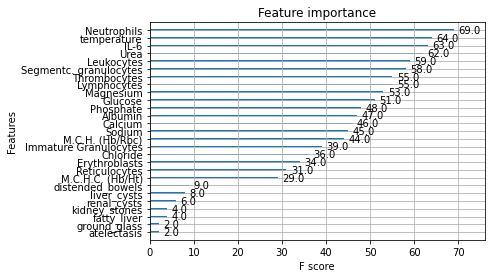

In [15]:
plot_importance(model)
pyplot.show()

We have built XGBoost model for predicting the likelihood of getting heart disease and the model has 0.23 rmse.
We have also found that the most important factor in finding out the heart disease is Neutrophils.